## Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plot
import seaborn as sns 

## Import Dataset

In [2]:
data = pd.read_csv("F:/data analyst roadmap/OASIS/customer_shopping_data.csv")

## Read Data

In [3]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,total_price,payment_method,Order Date,Month,Year,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5-Sep-19,September,2019,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,5-Sep-19,September,2019,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,17-Jun-21,June,2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,15-Jul-21,July,2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,15-Jul-21,July,2021,Kanyon


In [4]:
data.tail()

,invoice_no,customer_id,gender,age,category,quantity,total_price,payment_method,Order Date,Month,Year,shopping_mall
2533,I149026,C240770,Male,39,Clothing,1,300.08,Credit Card,27-Dec-24,December,2024,Viaport Outlet
2534,I287041,C163325,Female,50,Cosmetics,5,203.30,Credit Card,28-Dec-24,December,2024,Mall of Istanbul
2535,I323407,C241345,Female,40,Toys,4,143.36,Credit Card,29-Dec-24,December,2024,Mall of Istanbul
2536,I433430,C282448,Male,62,Toys,3,107.52,Debit Card,30-Dec-24,December,2024,Mall of Istanbul
2537,I140863,C240208,Male,18,Cosmetics,2,81.32,Debit Card,31-Dec-24,December,2024,Istinye Park


In [5]:
data.shape

(2538, 12)

In [6]:
round(data.describe())

,age,quantity,total_price,Year
count,2538.0,2538.0,2538.0,2538.0
mean,44.0,3.0,690.0,2022.0
std,15.0,1.0,977.0,2.0
min,18.0,1.0,5.0,2019.0
25%,30.0,2.0,41.0,2021.0
50%,43.0,3.0,203.0,2021.0
75%,56.0,4.0,1200.0,2023.0
max,69.0,5.0,5250.0,2024.0


In [7]:
data.nunique()

invoice_no        2538
customer_id       2538
gender               2
age                 52
category             8
quantity             5
total_price         40
payment_method       3
Order Date        1864
Month               12
Year                 6
shopping_mall       10
dtype: int64

In [8]:
data['Year'].unique()

array([2019, 2021, 2022, 2020, 2023, 2024], dtype=int64)

## Cleaning The Data

In [9]:
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
total_price       0
payment_method    0
Order Date        0
Month             0
Year              0
shopping_mall     0
dtype: int64

In [10]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,total_price,payment_method,Order Date,Month,Year,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5-Sep-19,September,2019,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,5-Sep-19,September,2019,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,17-Jun-21,June,2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,15-Jul-21,July,2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,15-Jul-21,July,2021,Kanyon


## Delete a Column

In [11]:
newdata = data.drop(['Order Date'],axis=1)
newdata.head()

,invoice_no,customer_id,gender,age,category,quantity,total_price,payment_method,Month,Year,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,September,2019,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,September,2019,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,June,2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,July,2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,July,2021,Kanyon


## New Updated column

In [12]:
newdata.head()

,invoice_no,customer_id,gender,age,category,quantity,total_price,payment_method,Month,Year,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,September,2019,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,September,2019,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,June,2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,July,2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,July,2021,Kanyon


## EDA Questions

### What is the number of customers who shopped at each mall?

shopping_mall
Zorlu Center         114
Forum Istanbul       116
Cevahir AVM          124
Viaport Outlet       127
Emaar Square Mall    141
Istinye Park         238
Metropol AVM         256
Metrocity            392
Mall of Istanbul     496
Kanyon               534
Name: count, dtype: int64


<Axes: ylabel='shopping_mall'>

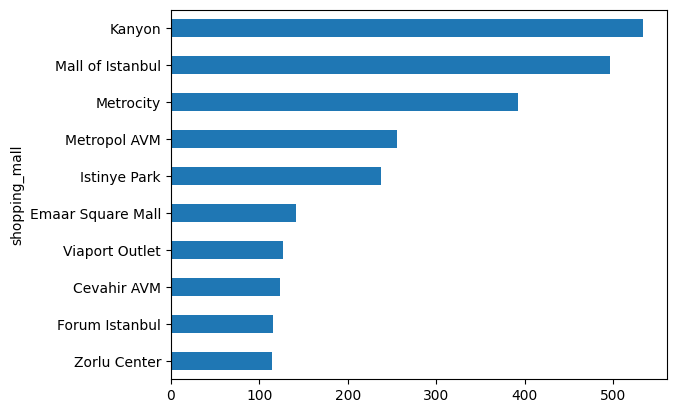

In [28]:
mall_customer_count = newdata['shopping_mall'].value_counts().sort_values()
print(mall_customer_count)
mall_customer_count.plot(kind='barh')

### What is the total amount spent by customers at each mall?

In [14]:
mall_total_amount_spent = newdata.groupby('shopping_mall')['total_price'].sum()
mall_total_amount_spent_sort=mall_total_amount_spent.sort_values(ascending=False)
print(mall_total_amount_spent_sort)

shopping_mall
Mall of Istanbul     387155.41
Kanyon               353792.44
Metrocity            229928.95
Metropol AVM         168392.63
Istinye Park         163938.65
Zorlu Center         103014.55
Emaar Square Mall     94012.31
Viaport Outlet        87847.15
Forum Istanbul        83224.69
Cevahir AVM           80795.72
Name: total_price, dtype: float64


### What is the average amount spent by customers at each mall?

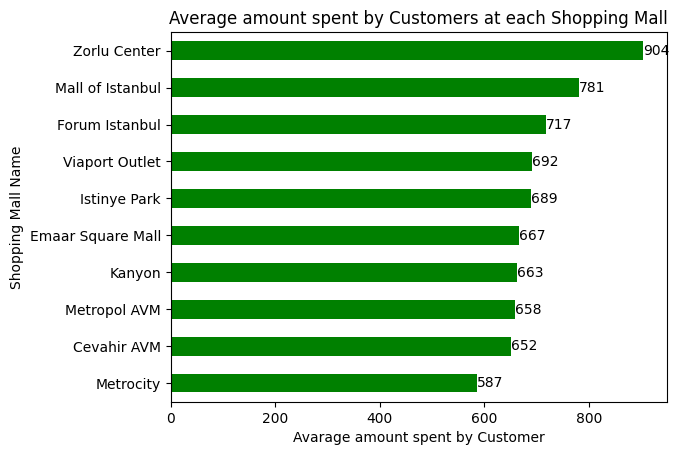

In [15]:
mall_avg_amount_spent = newdata.groupby('shopping_mall')['total_price'].mean().sort_values()

ax = mall_avg_amount_spent.plot(kind='barh', color='green')

# show the values inside the bars
for i, v in enumerate(mall_avg_amount_spent):
    ax.text(v + 0.1, i, str(round(v)), va='center')

plot.title('Average amount spent by Customers at each Shopping Mall')
plot.xlabel('Avarage amount spent by Customer')
plot.ylabel('Shopping Mall Name')
plot.show()

### What are the most popular payment methods used by customers?

payment_method
Cash           1114
Credit Card     898
Debit Card      526
Name: count, dtype: int64
Popular Payment Method is : Cash


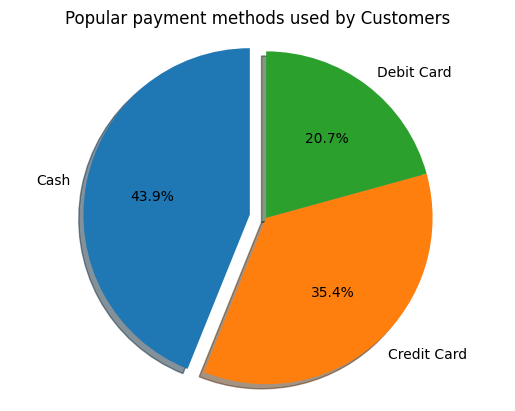

In [16]:
popular_payment_method = newdata['payment_method'].value_counts()
print(popular_payment_method)
popular_method = popular_payment_method.idxmax()
print('Popular Payment Method is :',popular_method)


explode = [0.1 if i == popular_method else 0 for i in popular_payment_method.index]
plot.pie(popular_payment_method,labels= popular_payment_method.index, autopct='%1.1f%%', explode=explode, startangle=90,shadow=True)

plot.title('Popular payment methods used by Customers')
plot.axis('equal')
plot.show()

### What is the most popular category of items purchased by customers?


category
Clothing           856
Cosmetics          403
Food & Beverage    391
Shoes              254
Toys               238
Souvenir           149
Technology         132
Books              115
Name: count, dtype: int64
Most popular category of items purchased by customers is :  Clothing


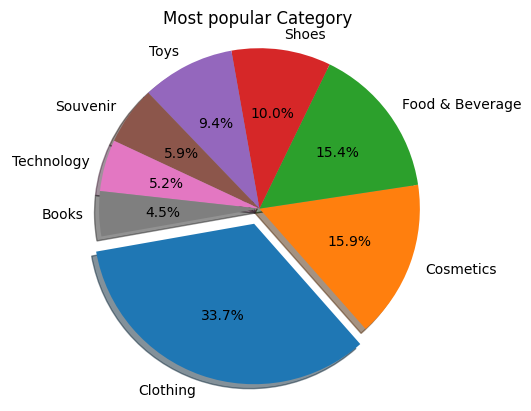

In [17]:
popular_category = newdata['category'].value_counts()
print(popular_category)
popular_category_id=popular_category.idxmax()
print('Most popular category of items purchased by customers is : ', popular_category_id)

explode=[0.1 if i == popular_category_id else 0 for i in popular_category.index]
plot.pie(popular_category, labels=popular_category.index, autopct='%1.1f%%' ,explode=explode, shadow=True, startangle=190)
plot.title('Most popular Category')
plot.axis('equal')
plot.show()

# Questions by Customer

### What is the total amount spent by a customer at a particular mall?

In [18]:
customer_mall_spent = newdata.groupby(['customer_id','shopping_mall'])['total_price'].sum()
print(customer_mall_spent)

customer_id  shopping_mall    
C100299      Metrocity              15.15
C100322      Viaport Outlet       5250.00
C100484      Metrocity             143.36
C100507      Mall of Istanbul     1500.40
C100684      Kanyon                 35.84
                                   ...   
C995929      Mall of Istanbul      121.98
C996668      Emaar Square Mall     121.98
C997380      Metrocity             162.64
C997987      Emaar Square Mall    1200.32
C999586      Zorlu Center          107.52
Name: total_price, Length: 2538, dtype: float64


# Question by Date

### What is the total amount of sales of each Shopping Mall by the Year?

In [19]:
shopping_mall_sales = round(newdata.groupby(['Year','shopping_mall'])['total_price'].sum().unstack(level=0))
print(shopping_mall_sales)

Year                  2019     2020     2021     2022     2023     2024
shopping_mall                                                          
Cevahir AVM        11257.0  29295.0  13218.0  16215.0   5700.0   5111.0
Emaar Square Mall  13998.0   6888.0  31069.0  25590.0   6890.0   9578.0
Forum Istanbul     11762.0   3529.0  30454.0   7952.0  20438.0   9090.0
Istinye Park       15766.0  15344.0  43685.0  30262.0  16834.0  42048.0
Kanyon             38225.0  41608.0  98267.0  84003.0  40516.0  51175.0
Mall of Istanbul   34555.0  57823.0  94316.0  73353.0  68153.0  58955.0
Metrocity          18086.0  22147.0  76141.0  44438.0  40152.0  28965.0
Metropol AVM       12217.0  20388.0  47161.0  29055.0  30756.0  28815.0
Viaport Outlet      8860.0  15078.0  24471.0  16660.0   9431.0  13347.0
Zorlu Center       12333.0  14758.0  22644.0  26101.0   7722.0  19457.0


### Which month has maximum sales of each Shopping mall ***

In [20]:
max_sales_month = newdata.groupby(['shopping_mall','Month'])['total_price'].sum().unstack(level=0)
info = max_sales_month.idxmax()

print("{:<30} {:<30} {:<30}".format("Shopping Mall Name","Maximum Sales Month","Maximum sales Amount"))
for i in info.index :
    max_month = info.loc[i]
    max_sales = max_sales_month.loc[max_month,i]
    print("{:<30} {:<30} {:<30}".format(i,max_month,round(max_sales)))

Shopping Mall Name             Maximum Sales Month            Maximum sales Amount          
Cevahir AVM                    November                       14056                         
Emaar Square Mall              March                          15248                         
Forum Istanbul                 December                       14726                         
Istinye Park                   November                       18671                         
Kanyon                         May                            43551                         
Mall of Istanbul               September                      45570                         
Metrocity                      December                       30461                         
Metropol AVM                   August                         23902                         
Viaport Outlet                 April                          12627                         
Zorlu Center                   February                       16280   

### Yearwise customer counts of each category

Year             2019  2020  2021  2022  2023  2024
category                                           
Books              11    11    40    20    15    18
Clothing           82   110   229   189   129   117
Cosmetics          48    46   106    90    49    64
Food & Beverage    44    65    94    91    50    47
Shoes              26    33    73    47    36    39
Souvenir           17    16    40    22    29    25
Technology         15    18    32    27    18    22
Toys               16    41    63    45    39    34


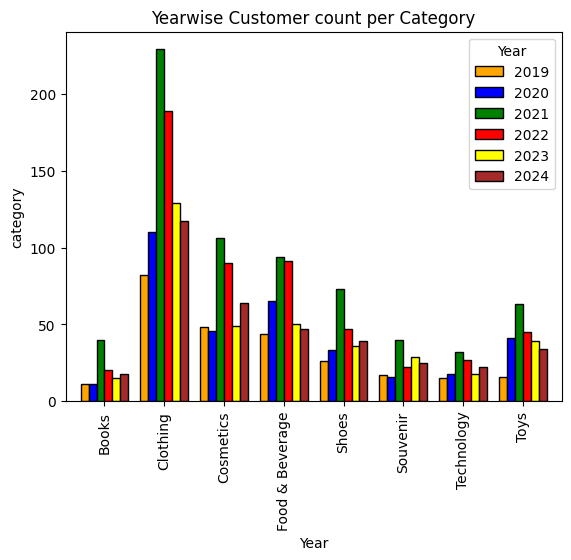

In [21]:
customer_per_category = newdata.groupby(['Year','category'])['customer_id'].nunique().unstack(level=0)
print(customer_per_category)

customer_per_category.plot(kind='bar' , color=['orange' , 'blue','green','red','yellow','brown'], width=0.8, edgecolor='black' )
plot.title('Yearwise Customer count per Category')
plot.xlabel('Year')
plot.ylabel('category')
plot.xticks(rotation=90)
plot.show()

# Questions by item

### What is the average price of an item in each category?

category
Technology         3309.0
Shoes              1855.0
Clothing            879.0
Cosmetics           124.0
Toys                105.0
Books                48.0
Souvenir             36.0
Food & Beverage      16.0
Name: total_price, dtype: float64


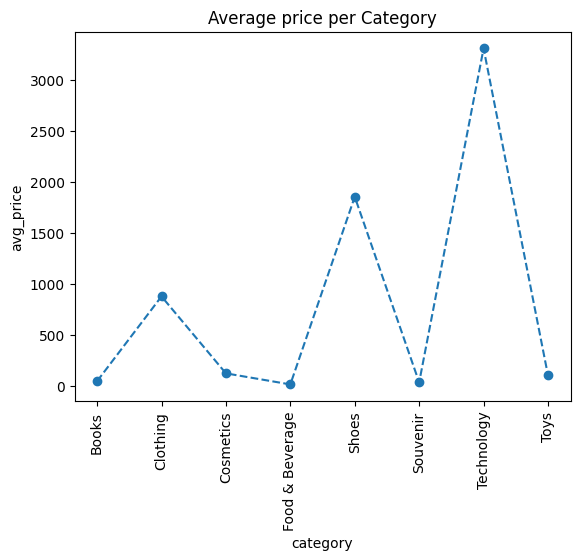

In [22]:
avg_price = newdata.groupby(['category'])['total_price'].mean()
print(round(avg_price).sort_values(ascending=False))

avg_price.plot( kind='line', marker='o', linestyle='--')

plot.title('Average price per Category')
plot.xlabel('category')
plot.ylabel('avg_price')
plot.xticks(rotation=90)
plot.show()

### Total Quantity sold in each Category

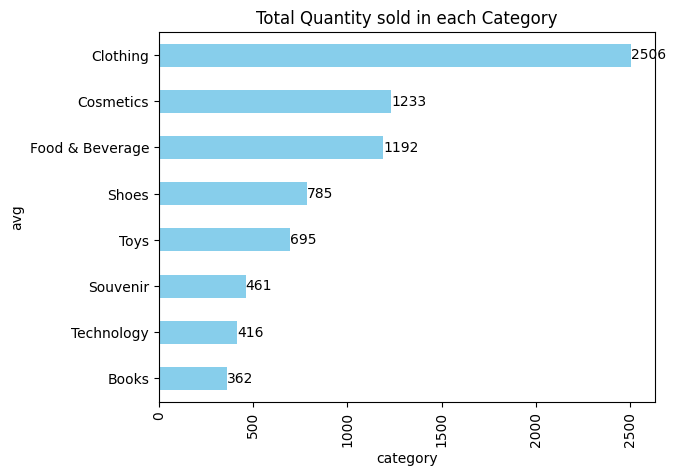

In [23]:
avg = newdata.groupby(['category'])['quantity'].sum().sort_values()

ax = avg.plot(kind = 'barh', color = 'skyblue')
for i,v in enumerate(avg):
    ax.text(v+0.1,i,str(v),va='center')

plot.title('Total Quantity sold in each Category')
plot.xlabel('category')
plot.ylabel('avg')
plot.xticks(rotation=90)
plot.show()

### Count the Male and Female customer of each Category 

gender           Female  Male
category                     
Books                69    46
Clothing            513   343
Cosmetics           252   151
Food & Beverage     244   147
Shoes               154   100
Souvenir             94    55
Technology           71    61
Toys                140    98


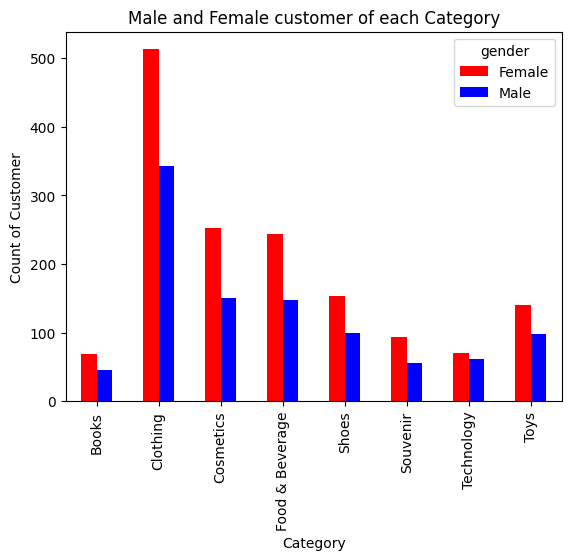

In [24]:
customer_gender = newdata.groupby(['category','gender'])['customer_id'].count().unstack()
print(customer_gender)

customer_gender.plot(kind='bar',color=['red','blue'])
plot.xlabel('Category')
plot.ylabel('Count of Customer')
plot.title('Male and Female customer of each Category')
plot.show()

### Which age category is most frequent of item purchased of each category

In [25]:
customer_age = newdata.groupby(['category','age'])['customer_id'].count().unstack(level=0)
print(customer_age.idxmax())

category
Books              22
Clothing           30
Cosmetics          26
Food & Beverage    26
Shoes              66
Souvenir           41
Technology         43
Toys               38
dtype: int64
